In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

In [3]:
design = designs.DesignPlanar()

In [4]:
# Since we are likely to be making many changes while tuning and modifying our design, we will enable overwriting.
# If you disable the next line, then you will need to delete a component [<component>.delete()] before recreating it.

design.overwrite_enabled = True

In [5]:
%metal_heading Hello Quantum World!

In [6]:
# We can also check all of the chip properties to see if we want to change the size or any other parameter.
# By default the name of chip is "main".
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

In [7]:
design.chips.main.size.size_x = '11mm'
design.chips.main.size.size_y = '9mm'

In [8]:
gui = MetalGUI(design)

11:08AM 03s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK

11:08AM 03s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: <QNSWindow: 0x7fbbcde40400; contentView=<QNSView: 0x7fbbcde3fcf0; QCocoaWindow(0x7fbbcde3fbd0, window=QWidgetWindow(0x7fbbcde3f730, name="MainWindowPlotWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.

11:08AM 04s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: <QNSWindow: 0x7fbbcd99c890; contentView=<QNSView: 0x7fbbcd99c160; QCocoaWindow(0x7fbbcd99c040, window=QWidgetWindow(0x7fbbcd99bb50, name="ElementsWindowWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and w

In [9]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket


q1 = TransmonPocket(design, 'Q1', options=dict(connection_pads=dict(a=dict()))) # Create a new Transmon Pocket object with name 'Q1'
gui.rebuild()  # rebuild the design and plot

gui.edit_component('Q1') # set Q1 as the editable component
gui.autoscale() #resize GUI to see QComponent

In [10]:
q1 #print Q1 information

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0um',                        
  'pos_y'             : '0um',                        
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '125um',                      
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '100um',                      
            'pocket_extent'     : '5um',                        
            'pocket_rise'       : '65um',                       
            'loc_W'             : '+1',                         
            'loc_H'             : '+1',                         

In [11]:
%metal_print How do I edit options?  API or GUI



In [12]:
# Change options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width  = '250 um'
q1.options.pad_gap    = '50 um'





In [13]:
gui.rebuild() # Update the component geoemtry, since we changed the options



# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()

gui.zoom_on_components(all_component_names)

# An alternate way to view within GUI. If want to try it, remove the "#" from the beginning of line.
#gui.autoscale() #resize GUI



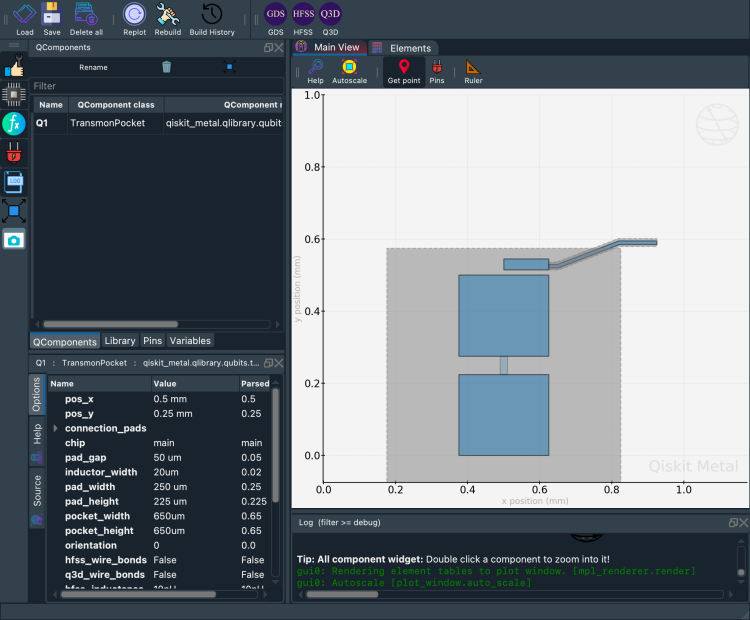

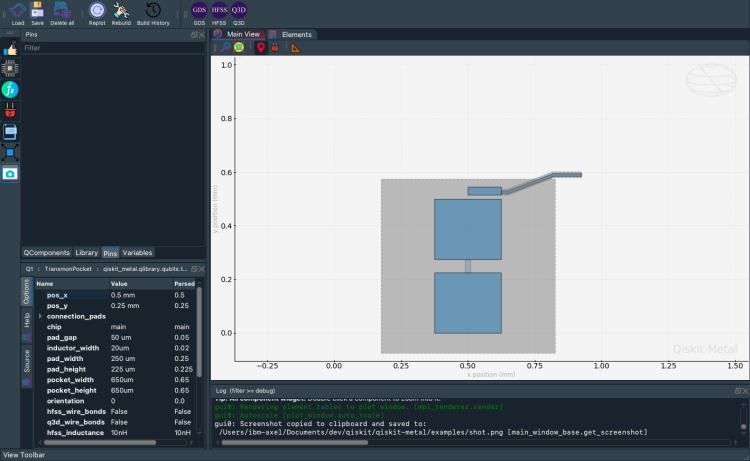

In [14]:
# Change options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width  = '250 um'
q1.options.pad_gap    = '50 um'

gui.rebuild() # Update the component geoemtry, since we changed the options
gui.autoscale() #resize GUI
gui.screenshot()

